#1. Introdução
É notório a relação histórica dos Estados Unidos da América (EUA) com armamentos, visto que, constitucionalmente, sua população tem garantido o direito de manter e portar armas, como explícito na Segunda Emenda, a qual foi aprovada em 15 de dezembro de 1791. Segundo um estudo divulgado, em 2007, pelo Small Arms Survey, os cidadãos estadunidenses retém, aproximadamente, 270 milhões de armas, sendo isso em torno de 88 armas a cada 100 pessoas.

Dentre as ocorrências noticiadas sobre incidentes relacionados a armas nos EUA, um dos tópicos mais emergentes é quanto ao número alarmante de tiroteios em massa que ocorrem nesse país. De acordo com um estudo divulgado, em 2016, por Adam Lankford, professor de criminologia na Universidade do Alabama, com base na análise de dados mundiais referentes a tiroteios em massa entre 1966 e 2012, foi concluído que 31% das ocorrências foram feitas por cidadãos dos Estados Unidos, sendo que esse país compõe menos de 5% da população mundial. 

Diante desse fato, tornou-se foco de estudo deste projeto analisar dados referentes aos tiroteios em massa estadunidenses, com o objetivo de encontrar padrões nos resultados e, possivelmente, os correlacionar com características desse país. Para a realização disso, foi usado um dataset disponibilizado no site Kaggle, o qual pode ser encontrado através deste [link](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years#Mass%20Shootings%20Dataset%20Ver%205.csv).

Abaixo será feito o carregamento do dataset, para visualização em Google Colab, e a importação das bibliotecas a serem usadas, assim como a leitura dos dados em conjunto com a limpeza de dados registrados fora do padrão a ser usado neste estudo. 

O dataset apresenta 20 colunas, as quais são:

* **Title**: Apresenta um título para o atentado, resumindo-o em poucas palavras

* **Location**: Mostra a cidade e o estado onde ocorreu o tiroteio em massa.

* **Date**: Mostra a data na qual o atentado aconteceu. 

* **Incident Area**: Mostra de forma mais especifica a região onde o tiroteio em massa ocorreu.

* **Open/Close Location**: Mostra se o local onde o incidente ocorreu era aberto ou não.

* **Target**: Mostra quem era o alvo do tiroteio.

* **Cause**: Mostra o motivo que levou a pessoa a cometer o atentado.

* **Summary**: Apresenta uma breve descrição do atentado.

* **Fatalities**: Mostra o número de pessoas mortas no incidente.

* **Injured**: Mostra o número de pessoas que sairam machucadas no incidente.

* **Total victims**: Mostra o número total de vitimas do incidente.

* **Policeman Killed**: Mostra o número de policiais mortos no incidente.

* **Age**: Mostra a idade da pessoa responsável pelo atentado.

* **Employeed (Y/N)**: Mostra se o responsável pelo atentado estava empregado ou não.

* **Employeed at**: Mostra o local aonde o responsável pelo atentado estava empregado.

* **Mental Health Issues**: Mostra se a pessoa responsável pelo tiroteio apresentava problemas de saúde mental.

* **Race**: Mostra a raça da pessoa responsável pelo tiroteio.

* **Gender**: Mostra o gênero da pessoas responsável pelo atentado.

* **Latitude**: Mostra a latitude do local onde ocorreu o incidente.

* **Longitude**: Mostra a longitude do local onde ocorreu o incidente.


In [1]:
# Upload de arquivo para análise

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dados.zip to dados.zip
User uploaded file "dados.zip" with length 74990 bytes


In [0]:
#Retirar os arquivos da pasta zipada
!unzip dados.zip

In [0]:
# Folium package
!pip install folium geocoder

In [0]:
# Conda
!apt install proj-bin libproj-dev libgeos-dev

In [0]:
# Word Cloud
!pip install wordcloud

In [0]:
# Instalação do Basemap direto do GitHub 
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [0]:
# Bibliotecas a serem utilizadas
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
import branca
import geocoder
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud
import json

In [22]:
# Leitura do dataset
data = pd.read_csv("Mass Shootings Dataset Ver 5.csv", encoding="Latin-1").iloc[:,1:]

# Retirando dados que não possuem latitude e longitude registrados
data = data[(data["Latitude"].isnull() != True) & (data["Longitude"].isnull() != True)].reset_index(drop=True)

# Alteração de dado fora do padrão de registro de gêneros
data["Gender"].replace({"M":"Male"}, inplace=True)

# Alteração de dados que apresentavam erros no número de mortes
data.loc[8, "Fatalities"] = 1
data.loc[178, "Fatalities"] = 3
data.loc[188, "Fatalities"] = 2
data.loc[153, "Fatalities"] = 4
data.loc[153, "Injured"] = 1
data.loc[153, "Total victims"] = 4

# Trocando dados faltantes por desconhecidos
data.Cause[data["Cause"].isnull()] = 'unknown'

data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,Male,36.181271,-115.134132
1,"Ferguson, MO Drive by","Ferguson, Missouri",4/29/2016,NaN,Open,random,unknown,A group of 15 to 20 people was gathered for a ...,0,4,4,0.0,0,NaN,NaN,Unknown,Unknown,Unknown,38.744217,-90.305391
2,"Forestville, Maryland Drive-by",NaN,4/26/2016,in street,Open,NaN,unknown,Shooter shot from his car at people standing o...,1,4,5,0.0,NaN,NaN,NaN,Unknown,Unknown,Unknown,38.845113,-76.874972
3,"Halifax County, VA",NaN,4/24/2016,crown,Open,random,unknown,Male shooter fired into crown when a deputy po...,0,6,6,0.0,NaN,NaN,NaN,Unknown,Black American or African American,Male,36.765971,-78.928344
4,Tire-Slashing revenge escalation,NaN,4/21/2016,block party,Open,random,frustration,Shooter was angry over fact that rival familie...,0,4,4,0.0,NaN,NaN,NaN,Unknown,Black American or African American,Male,39.290385,-76.612189


In [9]:
data.shape

(303, 20)

#2. Distribuição de Tiroteios em Massa nos EUA

Com base no dataset de tiroteios em mssa, abaixo é feito a distribuição geográfica dos 303 casos a serem analisados neste projeto, através do uso de um BaseMap e de um HeatMap.

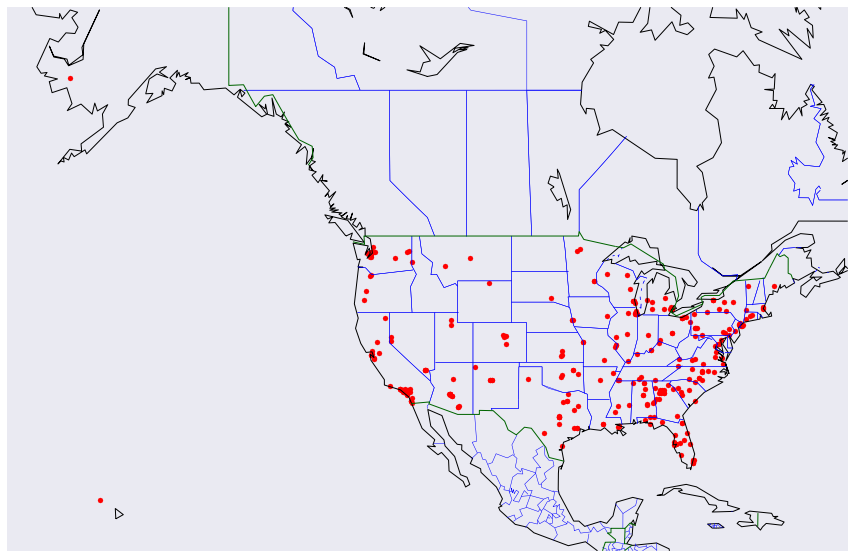

In [23]:
# Uso de recurso Basemap
m = Basemap(projection="merc",
            llcrnrlat=15,
            urcrnrlat=65,
            llcrnrlon=-170,
            urcrnrlon=-60
           )

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = m(longitudes, latitudes)
fig,ax = plt.subplots(figsize=(60,10))
m.scatter(x,y,s=25, color="red")
m.drawcoastlines()
m.drawstates(color="blue")
m.fillcontinents(alpha=False)
m.drawcountries(color="darkgreen", linewidth=1.0)
plt.show()

In [24]:
# Coordenadas
coordinates = []
for i in tqdm(range(len(data))):
    coordinates.append([data.loc[i,'Latitude'], data.loc[i,'Longitude']])

# Criação de mapa para visualizar o HeatMap
heat = folium.Map(
    location=[39.381266, -97.922211],
    zoom_start=4,
    tiles='Stamen Terrain',
    width='75%',
    height='75%'
)

HeatMap(coordinates).add_to(heat)

heat

100%|██████████| 303/303 [00:00<00:00, 40174.31it/s]


Com base nos mapas apresentados acima, pode-se observar que há uma considerável concentração de tiroteios na região leste dos EUA, assim como alguns locais de concentração no lado oeste, em contraste à região central que apresenta os dados mais espalhados.

#3. Análise do Número de Fatalidades e de Vítimas

Para a realização desta análise, foi realizado o trabalho com os extremos, observando casos que apresentam: 



*   A menor quantidade do número de vítimas e de fatalidades
*   A maior quantidade do número de vítimas e de fatalidades


Inicialmente, foram observados os casos com o menor número de vitimas. Para isto, determinou-se, primeiro, o número mínimo de vitimas entre os casos citados. 

In [25]:
# Obsevando o menor número de vitimas entre os casos apresentados

data["Total victims"].min()

3

Encontrado que o menor número de vítimas é 3, é necessário determinar quantos casos apresentam esse número de vítimas.

In [26]:
# Identificando quantos casos apresentam o menor valor entre o total de vitimas

data[data["Total victims"] == data["Total victims"].min()].shape

(50, 20)

Visto que há 50 casos que apresentam o número mínimo de vitimas, agora é mostrado quais casos são estes.

In [27]:
# Mostrando os casos que o número de vitimas é o menor encontrado

data[data["Total victims"] == data["Total victims"].min()].head()

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
12,"Albuquerque, NM Family restaurant shooting",NaN,4/1/2016,restaurant,Close,Family,unknown,The shooter killed two of his nephews at the r...,3,1,3,0.0,NaN,NaN,NaN,Unknown,Asian American,Male,35.085334,-106.605553
13,"Richmond, Virginia","Richmond, Virginia",3/31/2016,bus station,Open,Trooper,frustration,A man fatally shot a Virginia state trooper at...,2,2,3,0.0,NaN,NaN,NaN,Unknown,Black American or African American,Male,37.540725,-77.436048
14,"Louisburg, North Carolina","Louisburg, North Carolina",3/26/2016,NaN,NaN,NaN,terrorism,Three people were killed in a shooting at a ho...,3,0,3,NaN,NaN,NaN,NaN,Unknown,Black American or African American,Male,36.099039,-78.301106
15,"Lawrenceburg, Tennessee","Lawrenceburg, Tennessee",3/25/2016,in home,Close,Family,domestic dispute,The man was suspected of shooting his wife and...,2,2,3,0.0,NaN,NaN,NaN,Unknown,Unknown,Male,35.242302,-87.334739
16,"Greenhill, AL Family murder-suicide",NaN,3/25/2016,home in rural Alabama,Close,Family,domestic dispute,Husband murders his wife and injures his two s...,2,2,3,0.0,NaN,NaN,NaN,Yes,White American or European American,Male,34.759257,-86.602493


Feito toda esta análise sobre o número mínimo de vítimas, agora é possível passar para a observação da quantidade mínima de fatalidades, seguindo o mesmo processo anterior.

Primeiramente, determinando o número mínimo de mortes, que no caso é 0.

In [28]:
# Obsevando o menor número de fatalidades entre os casos apresentados

data["Fatalities"].min()

0

Depois, verificando quantos casos não apresentam mortes, os quais são 38.

In [29]:
# Identificando quantos casos apresentam o menor valor entre o total de fatalidades

data[data["Fatalities"] == data["Fatalities"].min()].shape

(38, 20)

E por fim, plotando os casos que apresentam o número minimo de mortes.

In [30]:
# Mostrando os casos que o número de fatalidades é o menor encontrado

data[data["Fatalities"] == data["Fatalities"].min()].head()

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
1,"Ferguson, MO Drive by","Ferguson, Missouri",4/29/2016,NaN,Open,random,unknown,A group of 15 to 20 people was gathered for a ...,0,4,4,0.0,0,NaN,NaN,Unknown,Unknown,Unknown,38.744217,-90.305391
3,"Halifax County, VA",NaN,4/24/2016,crown,Open,random,unknown,Male shooter fired into crown when a deputy po...,0,6,6,0.0,NaN,NaN,NaN,Unknown,Black American or African American,Male,36.765971,-78.928344
4,Tire-Slashing revenge escalation,NaN,4/21/2016,block party,Open,random,frustration,Shooter was angry over fact that rival familie...,0,4,4,0.0,NaN,NaN,NaN,Unknown,Black American or African American,Male,39.290385,-76.612189
9,"Albuquerque, NM House party shooting",NaN,4/9/2016,at party,Close,uninvited guests,anger,A Man shot four uninvited party guests who wou...,0,4,4,0.0,NaN,NaN,NaN,Unknown,White American or European American,Male,35.085334,-106.605553
10,"Memphis, TN gas station shooting",NaN,4/9/2016,at gas station,Open,random,anger,Four people were shot below the waist at a gas...,0,4,4,0.0,NaN,NaN,NaN,Unknown,Unknown,Unknown,35.149534,-90.048980


Algo interessante a se observar é que não obrigatóriamente um atentado que não apresenta mortes irá apresentar o menor número de vitimas. E também, não é pelo número de vítimas ser o menor que não ocorreram mortes.

Agora, partindo para para a análise do caso com maior número de vítimas e de fatalidades, uma vez que ao analisar os casos foi observado que este é o mesmo, como pode ser observados nas células abaixo.

In [19]:
#Caso com maior número de vitimas

data[data["Total victims"] == data["Total victims"].max()]

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,Male,36.181271,-115.134132


In [20]:
#Caso com maior número de fatalidade

data[data["Fatalities"] == data["Fatalities"].max()]

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,Male,36.181271,-115.134132


Neste caso, ocorrido em Las Vegas, o número de vítimas foi de 585 e o número de mortes foi de 59, inluindo a morte do atirador, que cometeu suicídio após a realização do atentado. Sendo assim, temos que aproximadamente 9,91% das vítimas desse atentando morreram.

Abaixo, foi desenvolvido um Choropleth sobre o número de vítimas por estado, com uso de um arquivo .json, disponibilizado no [GitHub](https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json), o qual reúne dados geográficos dos estados do país sob estudo.

In [0]:
# Identificação dos estados em que cada caso ocorreu

data.loc[0,"State"] = "Nevada"
data.loc[1,"State"] = "Missouri"
data.loc[2,"State"] = "Maryland"
data.loc[3,"State"] = "Virginia"
data.loc[4,"State"] = "Maryland"
data.loc[5,"State"] = "Illinois"
data.loc[6,"State"] = "Texas"
data.loc[7,"State"] = "Alabama"
data.loc[8,"State"] = "California"
data.loc[9,"State"] = "New Mexico"
data.loc[10,"State"] = "Tennessee"
data.loc[11,"State"] = "Illinois"
data.loc[12,"State"] = "New Mexico"
data.loc[13,"State"] = "Virginia"
data.loc[14,"State"] = "North Carolina"
data.loc[15,"State"] = "Tennessee"
data.loc[16,"State"] = "Alabama"
data.loc[17,"State"] = "Texas"
data.loc[18,"State"] = "Kentucky"
data.loc[19,"State"] = "Florida"
data.loc[20,"State"] = "Alabama"
data.loc[21,"State"] = "Georgia"
data.loc[22,"State"] = "Florida"
data.loc[23,"State"] = "Georgia"
data.loc[24,"State"] = "New Jersey"
data.loc[25,"State"] = "Michigan"
data.loc[26,"State"] = "Pennsylvania"
data.loc[27,"State"] = "Pittsburgh"
data.loc[28,"State"] = "Kansas"
data.loc[29,"State"] = "Louisiana"
data.loc[30,"State"] = "Kansas"
data.loc[31,"State"] = "Massachusetts"
data.loc[32,"State"] = "Georgia"
data.loc[33,"State"] = "Kansas"
data.loc[34,"State"] = "Michigan"
data.loc[35,"State"] = "California"
data.loc[36,"State"] = "Virginia"
data.loc[37,"State"] = "Washington"
data.loc[38,"State"] = "Kansas"
data.loc[39,"State"] = "Washington"
data.loc[40,"State"] = "Arizona"
data.loc[41,"State"] = "Missouri"
data.loc[42,"State"] = "Texas"
data.loc[43,"State"] = "Mississippi"
data.loc[44,"State"] = "Florida"
data.loc[45,"State"] = "Michigan"
data.loc[46,"State"] = "California"
data.loc[47,"State"] = "Michigan"
data.loc[48,"State"] = "Florida"
data.loc[49,"State"] = "New York"
data.loc[50,"State"] = "Florida"
data.loc[51,"State"] = "California"
data.loc[52,"State"] = "Texas"
data.loc[53,"State"] = "Louisiana"
data.loc[54,"State"] = "Arizona"
data.loc[55,"State"] = "Virginia"
data.loc[56,"State"] = "Virginia"
data.loc[57,"State"] = "California"
data.loc[58,"State"] = "Florida"
data.loc[59,"State"] = "California"
data.loc[60,"State"] = "Virginia"
data.loc[61,"State"] = "Delaware"
data.loc[62,"State"] = "Tennessee"
data.loc[63,"State"] = "Florida"
data.loc[64,"State"] = "Nebraska"
data.loc[65,"State"] = "California"
data.loc[66,"State"] = "Ohio"
data.loc[67,"State"] = "Minnesota"
data.loc[68,"State"] = "Texas"
data.loc[69,"State"] = "Florida"
data.loc[70,"State"] = "Georgia"
data.loc[71,"State"] = "Maine"
data.loc[72,"State"] = "Colorado"
data.loc[73,"State"] = "Ohio"
data.loc[74,"State"] = "Arizona"
data.loc[75,"State"] = "Oregon"
data.loc[76,"State"] = "Florida"
data.loc[77,"State"] = "Georgia"
data.loc[78,"State"] = "South Dakota"
data.loc[79,"State"] = "Minnesota"
data.loc[80,"State"] = "Tennessee"
data.loc[81,"State"] = "Virginia"
data.loc[82,"State"] = "New York"
data.loc[83,"State"] = "Texas"
data.loc[84,"State"] = "Louisiana"
data.loc[85,"State"] = "Georgia"
data.loc[86,"State"] = "Tennessee"
data.loc[87,"State"] = "Illinois"
data.loc[88,"State"] = "North Carolina"
data.loc[89,"State"] = "South Carolina"
data.loc[90,"State"] = "Florida"
data.loc[91,"State"] = "Montana"
data.loc[92,"State"] = "Ohio"
data.loc[93,"State"] = "Georgia"
data.loc[94,"State"] = "Illinois"
data.loc[95,"State"] = "Arizona"
data.loc[96,"State"] = "New Jersey"
data.loc[97,"State"] = "Wisconsin"
data.loc[98,"State"] = "Wisconsin"
data.loc[99,"State"] = "New York"
data.loc[100,"State"] = "Texas"
data.loc[101,"State"] = "Arizona"
data.loc[102,"State"] = "Georgia"
data.loc[103,"State"] = "Indiana"
data.loc[104,"State"] = "Florida"
data.loc[105,"State"] = "Oklahoma"
data.loc[106,"State"] = "Florida"
data.loc[107,"State"] = "New Mexico"
data.loc[108,"State"] = "Arizona"
data.loc[109,"State"] = "Alabama"
data.loc[110,"State"] = "Mississippi"
data.loc[111,"State"] = "North Carolina"
data.loc[112,"State"] = "Alabama"
data.loc[113,"State"] = "Missouri"
data.loc[114,"State"] = "North Carolina"
data.loc[115,"State"] = "Georgia"
data.loc[116,"State"] = "Texas"
data.loc[117,"State"] = "North Carolina"
data.loc[118,"State"] = "Florida"
data.loc[119,"State"] = "Pennsylvania"
data.loc[120,"State"] = "Georgia"
data.loc[121,"State"] = "North Carolina"
data.loc[122,"State"] = "New York"
data.loc[123,"State"] = "Georgia"
data.loc[124,"State"] = "New York"
data.loc[125,"State"] = "Nebraska"
data.loc[126,"State"] = "Idaho"
data.loc[127,"State"] = "Tennessee"
data.loc[128,"State"] = "Pennsylvania"
data.loc[129,"State"] = "West Virginia"
data.loc[130,"State"] = "Florida"
data.loc[131,"State"] = "Washington"
data.loc[132,"State"] = "New Mexico"
data.loc[133,"State"] = "Louisiana"
data.loc[134,"State"] = "Nevada"
data.loc[135,"State"] = "Washington"
data.loc[136,"State"] = "Georgia"
data.loc[137,"State"] = "Texas"
data.loc[138,"State"] = "California"
data.loc[139,"State"] = "California"
data.loc[140,"State"] = "Alabama"
data.loc[141,"State"] = "California"
data.loc[142,"State"] = "Nevada"
data.loc[143,"State"] = "District of Columbia"
data.loc[144,"State"] = "Oklahoma"
data.loc[145,"State"] = "Texas"
data.loc[146,"State"] = "Pennsylvania"
data.loc[147,"State"] = "Florida"
data.loc[148,"State"] = "California"
data.loc[149,"State"] = "Illinois"
data.loc[150,"State"] = "Washington"
data.loc[151,"State"] = "New York"
data.loc[152,"State"] = "California"
data.loc[153,"State"] = "California"
data.loc[154,"State"] = "Arizona"
data.loc[155,"State"] = "New Mexico"
data.loc[156,"State"] = "Connecticut"
data.loc[157,"State"] = "Oregon"
data.loc[158,"State"] = "Wisconsin"
data.loc[159,"State"] = "Florida"
data.loc[160,"State"] = "Minnesota"
data.loc[161,"State"] = "Wisconsin"
data.loc[162,"State"] = "Colorado"
data.loc[163,"State"] = "Alabama"
data.loc[164,"State"] = "Washington"
data.loc[165,"State"] = "Washington"
data.loc[166,"State"] = "Oklahoma"
data.loc[167,"State"] = "California"
data.loc[168,"State"] = "Ohio"
data.loc[169,"State"] = "Georgia"
data.loc[170,"State"] = "Alabama"
data.loc[171,"State"] = "California"
data.loc[172,"State"] = "Nevada"
data.loc[173,"State"] = "Michigan"
data.loc[174,"State"] = "Alabama"
data.loc[175,"State"] = "Ohio"
data.loc[176,"State"] = "Arizona"
data.loc[177,"State"] = "Connecticut"
data.loc[178,"State"] = "Alabama"
data.loc[179,"State"] = "Washington"
data.loc[180,"State"] = "Washington"
data.loc[181,"State"] = "Texas"
data.loc[182,"State"] = "New York"
data.loc[183,"State"] = "North Carolina"
data.loc[184,"State"] = "California"
data.loc[185,"State"] = "North Carolina"
data.loc[186,"State"] = "Alabama"
data.loc[187,"State"] = "California"
data.loc[188,"State"] = "Arkansas"
data.loc[189,"State"] = "Arizona"
data.loc[190,"State"] = "Kentucky"
data.loc[191,"State"] = "Illinois"
data.loc[192,"State"] = "Missouri"
data.loc[193,"State"] = "Washington"
data.loc[194,"State"] = "Nevada"
data.loc[195,"State"] = "Colorado"
data.loc[196,"State"] = "Nebraska"
data.loc[197,"State"] = "Michigan"
data.loc[198,"State"] = "Ohio"
data.loc[199,"State"] = "Wisconsin"
data.loc[200,"State"] = "Virginia"
data.loc[201,"State"] = "Oregon"
data.loc[202,"State"] = "Utah"
data.loc[203,"State"] = "Pennsylvania"
data.loc[204,"State"] = "Pennsylvania"
data.loc[205,"State"] = "Pennsylvania"
data.loc[206,"State"] = "North Carolina"
data.loc[207,"State"] = "Vermont"
data.loc[208,"State"] = "Washington"
data.loc[209,"State"] = "California"
data.loc[210,"State"] = "Minnesota"
data.loc[211,"State"] = "Wisconsin"
data.loc[212,"State"] = "Texas"
data.loc[213,"State"] = "Ohio"
data.loc[214,"State"] = "Wisconsin"
data.loc[215,"State"] = "Illinois"
data.loc[216,"State"] = "Mississippi"
data.loc[217,"State"] = "Ohio"
data.loc[218,"State"] = "Arizona"
data.loc[219,"State"] = "Virginia"
data.loc[220,"State"] = "California"
data.loc[221,"State"] = "Illinois"
data.loc[222,"State"] = "Massachusetts"
data.loc[223,"State"] = "Florida"
data.loc[224,"State"] = "Oklahoma"
data.loc[225,"State"] = "Hawaii"
data.loc[226,"State"] = "Texas"
data.loc[227,"State"] = "Georgia"
data.loc[228,"State"] = "Georgia"
data.loc[229,"State"] = "Colorado"
data.loc[230,"State"] = "California"
data.loc[231,"State"] = "Oregon"
data.loc[232,"State"] = "Pennsylvania"
data.loc[233,"State"] = "Arkansas"
data.loc[234,"State"] = "Connecticut"
data.loc[235,"State"] = "Wisconsin"
data.loc[236,"State"] = "California"
data.loc[237,"State"] = "Kentucky"
data.loc[238,"State"] = "Mississippi"
data.loc[239,"State"] = "South Carolina"
data.loc[240,"State"] = "Alaska"
data.loc[241,"State"] = "California"
data.loc[242,"State"] = "Florida"
data.loc[243,"State"] = "Washington"
data.loc[244,"State"] = "Tenneessee"
data.loc[245,"State"] = "Texas"
data.loc[246,"State"] = "New Jersey"
data.loc[247,"State"] = "North Carolina"
data.loc[248,"State"] = "Massachusetts"
data.loc[249,"State"] = "Ohio"
data.loc[250,"State"] = "Washington"
data.loc[251,"State"] = "Kentucky"
data.loc[252,"State"] = "Michigan"
data.loc[253,"State"] = "Colorado"
data.loc[254,"State"] = "New York"
data.loc[255,"State"] = "Wyoming"
data.loc[256,"State"] = "North Carolina"
data.loc[257,"State"] = "Utah"
data.loc[258,"State"] = "California"
data.loc[259,"State"] = "Michigan"
data.loc[260,"State"] = "California"
data.loc[261,"State"] = "Massachusetts"
data.loc[262,"State"] = "New York"
data.loc[263,"State"] = "Texas"
data.loc[264,"State"] = "California"
data.loc[265,"State"] = "Michigan"
data.loc[266,"State"] = "Iowa"
data.loc[267,"State"] = "Texas"
data.loc[268,"State"] = "New Jersey"
data.loc[269,"State"] = "Arizona"
data.loc[270,"State"] = "Florida"
data.loc[271,"State"] = "Kentucky"
data.loc[272,"State"] = "California"
data.loc[273,"State"] = "California"
data.loc[274,"State"] = "Louisiana"
data.loc[275,"State"] = "South Carolina"
data.loc[276,"State"] = "Illinois"
data.loc[277,"State"] = "Illinois"
data.loc[278,"State"] = "California"
data.loc[279,"State"] = "Florida"
data.loc[280,"State"] = "Florida"
data.loc[281,"State"] = "Montana"
data.loc[282,"State"] = "Oklahoma"
data.loc[283,"State"] = "New York"
data.loc[284,"State"] = "Georgia"
data.loc[285,"State"] = "Kansas"
data.loc[286,"State"] = "California"
data.loc[287,"State"] = "Texas"
data.loc[288,"State"] = "California"
data.loc[289,"State"] = "South Carolina"
data.loc[290,"State"] = "Washington"
data.loc[291,"State"] = "Florida"
data.loc[292,"State"] = "Nevada"
data.loc[293,"State"] = "South Carolina"
data.loc[294,"State"] = "California"
data.loc[295,"State"] = "California"
data.loc[296,"State"] = "California"
data.loc[297,"State"] = "New York"
data.loc[298,"State"] = "Illinois"
data.loc[299,"State"] = "Louisiana"
data.loc[300,"State"] = "Washington"
data.loc[301,"State"] = "Arizona"
data.loc[302,"State"] = "Texas"

In [0]:
#Criação de um dataframe para coleta de vítimas por estado 
to_geojson = pd.DataFrame(columns=["State", "Number_of_Victims"])

transicao = {}
var = 0
for state in data["State"]:
  if state in transicao:
    pass
  else:
    transicao[state] = 1
    x = data[data["State"] == state]["Total victims"].sum()
    to_geojson.loc[var, "State"] = state
    to_geojson.loc[var, "Number_of_Victims"] = x
    var += 1
    
# Introduzindo ao dataframe também os estados da Dakota do Norte e New Hampshire
# para evitar inconsistências.  
to_geojson.loc[var, "State"] = "North Dakota"
to_geojson.loc[var, "Number_of_Victims"] = 0
var +=1
to_geojson.loc[var, "State"] = "New Hampshire"
to_geojson.loc[var, "Number_of_Victims"] = 0


In [20]:
# Carregar os dados utilizando enconding='UTF-8'
geo_json_data = json.load(open("us-states.json",encoding='UTF-8'))

# Criação de um mapa
p = folium.Map(
    location=[39.381266, -97.922211],
    zoom_start=4,
    tiles='Stamen Terrain'
)

# Criação de uma lengenda
threshold_scale = np.linspace(to_geojson['Number_of_Victims'].min(),
                              to_geojson['Number_of_Victims'].max(), 6, dtype=int).tolist()

# Desenvolvendo o Choropleth
p.choropleth(
    geo_data=geo_json_data,
    data=to_geojson,
    columns=['State', 'Number_of_Victims'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    legend_name='Victims per State',
    highlight=True,
    threshold_scale = threshold_scale
)

p

Como observado no mapa acima, o estado de Nevada se destaca devido, principalmente, ao número de vítimas do atentado comentado anteriormente. É notável a divergência entre a dispersão dos estados com o maior número de vítimas e a apresentada inicialmente das distribuições gerais, visto que este mapa destaca os estados do lado oeste ao invés do leste, principalmente, Nevada e Califórnia.

#4. Assassinatos em Massa, de acordo com o FBI

O termo "tiroteio em massa" não possui um significado oficial nos Estados Unidos, sendo suas características determinantes variáveis de acordo com diversos órgãos, como pesquisadores científicos e agências federais. Por exemplo, o Gun Violence Archive (GVA), uma corporação sem fins lucrativos que trabalha em coletar e divulgar dados sobre violência armada nos EUA, define tiroteio em massa como um incidente em que 4 ou mais pessoas são baleados e/ou mortos, no mesmo local e tempo, excluíndo o atirador. Enquanto que para o Mass Shooting Tracker, outra organização que coleta e divulga dados sobre violência armada nos EUA, tiroteio em massa é um evento em que 4 ou mais pessoas são baleadas, podendo contabilizar o atirador ou cidadãos que foram baleados pela polícia no confronto. 

Uma das definições mais comumente utilizadas é referente à definição determinada pelo FBI (Federal Bureau of Investigation) para "assassinatos em massa", em que 4 ou mais pessoas são mortas em um local e tempo, excluindo o causador. Contudo, devido a apenas considerar casos em que ocorre uma certa quantidade de mortes, essa definição não é aceita por todos. Também, ao analisar-se os dados apresentados acima em "Análise do Número de Fatalidades e Vítimas", pode-se perceber casos em que houve várias vítimas, contudo, não houve mortes.

Diante disso, neste tópico foi decidido observar a quantidade dos dados que seriam considerados como assassinatos em massa pelo FBI dentre os casos apresentados no dataset estudado.

In [32]:
mass_murders = data[(data["Total victims"] - data["Injured"]) >= 4]
mass_murders.head()

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,...,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,State
0,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,...,1.0,64,NaN,NaN,Unclear,White,Male,36.181271,-115.134132,Nevada
6,Texas family murder-suicide,NaN,4/19/2016,Home,Close,Family,domestic dispute,Man killed his wife and two young children bef...,4,0,...,0.0,NaN,NaN,NaN,Unknown,White American or European American,Male,29.785785,-95.824396,Texas
26,"Pittsburgh, Pennsylvania","Pittsburgh, Pennsylvania",3/9/2016,backyard of a house,Open,random,terrorism,Two gunmen working as a team fatally shot five...,6,3,...,0.0,NaN,NaN,NaN,Unknown,Unknown,Male,40.440625,-79.995886,Pennsylvania
27,Wilkinsburg BBQ cookout shootout,NaN,3/9/2016,backyard of a house,Open,random,terrorism,A family was having a cookout in the backyard ...,5,3,...,0.0,NaN,NaN,NaN,Unknown,Unknown,Male,40.441736,-79.881994,Pittsburgh
28,"Kansas City, Kansas","Kansas City, Kansas",3/7/2016,Home,Close,neighbors,unknown,Four people were found dead Monday night in a ...,5,0,...,0.0,NaN,NaN,NaN,Unknown,Some other race,Male,39.114053,-94.627464,Kansas


In [33]:
mass_murders.shape

(122, 21)

Diante do apresentado acima, tem-se que 122 dos 303 casos estudados seriam considerados assassinatos em massa, logo, um total de 40% dos casos, aproximadamente. Com isso, perante a possível exclusão considerável de casos diante da definição de "assassinatos em massa", torna-se perceptível que a definição do FBI não seria a melhor a ser aplicada para tiroteios em massa.

#5. Identificação da Ocorrência de Morte dos Atiradores

Agora, será feita a observação de se o responsável pelo atentado morreu em decorrência do evento causado por ele. Podendo, esta morte, ser causada por suicídio ou devido a um confronto com a policia e/ou população do local.

Para isto, foi observado que em casos onde o(s) responsável(is) pelo atentado morre, a soma do número de fatalidades com o número de machucados apresenta uma variação em relação ao número total de vítimas, uma vez que o atirador não é considerado vítima. 

Partindo deste principio, realizamos a seguinte operação:

Considere x um caso de tiroteio em massa, sendo assim 


>***Diferenca = número de fatalidades de x + número de machucados de x - número de vitimas  de x no total ***

Se a diferença for maior do que 0, ocorreu a morte do responsável em decorrência do atentado. 







In [34]:
# Executores mortos nos locais

diferenca = data["Fatalities"] + data["Injured"] - data["Total victims"]
print (diferenca.value_counts())

0    185
1    115
2      3
dtype: int64


Observando a tabela acima, temos que:



> Em 185 casos (aproximadamente, 61%), quem cometeu o tiroteio em massa não foi morto.

> Em 115 casos (aproximadamente, 38%) , um responsável morreu.

> Em 3 casos (cerca de 1%), ocorreu a morte de dois dos responsáveis.




#6. Análise das Causas 

Nesse parte do processo, é realizado a tentativa de observar o motivo que leva os atiradores a cometer esses atos. Para isto, foi realizada uma iteração sobre a coluna "Cause", verificando e contabilizando a presença de cada causa presente no dataset.

In [35]:
#Analise das causas

count_causas = {}
soma = 0

for i in data["Cause"]:
  
  if i == "domestic disputer":
    i = "domestic dispute"
  
  if i in count_causas:
    count_causas[i] +=1
  else:
    count_causas[i] = 1
    
for key, value in count_causas.items():
  soma += value

df = pd.Series(count_causas)
print (df)

anger                   44
breakup                  1
domestic dispute        13
drunk                    1
failing exams            3
frustration             18
psycho                  66
racism                   4
religious radicalism     1
revenge                 10
robbery                  1
suspension               1
terrorism               61
unemployement            9
unknown                 70
dtype: int64


Como é observado na tabela acima, relevando os casos onde o motivo é desconhecido, tens-se que as principais razões para tiroteios em massa, são:


*   Psicopatia, representando 28,8% dos casos conhecidos. 
*   Terrorismo, que compõem cerca de 26,1% dos casos com motivo aparente.

Os atos terroristas são caracterizados como ações violentas realizadas por meio de ataques direcionados a instalações ou a elementos de um governo ou que pertençam a uma população governada, de modo a disseminar o medo e provocar efeitos psicológicos que vão além dos círculo social da vítima, atingindo toda a população daquele terrotório. Estas ações são bastante utilizadas por diversas instituições (como, grupos separatistas, organizações politicas) para assim alcançar seus objetivos.

Já a psicopatia é tida como um grave distúrbio mental em que a pessoa com ele diagnosticada não demostra remorso ou arrependimento por possuir comportamentos antissociais e amorais. Além disso, ele não apresenta a capacidade de se relacionar com outras pessoas e possuir laços afetivos profundos, não é capaz de aprender com a experiência e tem egocentrismo extremo.

A partir desses conceitos, o que pode-se entender com esses dois grupos demonstrando grande representatividade é o fato de que muitos dos atiradores apresentam a ideia de almejar o poder e/ou atingir um ideal de vingança que serve para compensar as injustiças por eles sofridas.  Diante dessa vontade de propagar violência, juntamente com os demais sentimentos negativos por eles nutridos (que também se relacionam a raiva e a frustação, os quais aparecem entre os possíveis motivos), culminam em eventos destrutivos em uma grande escala, como os tiroteios em massa.



#7. Proporção de Atiradores por Gênero

A análise abaixo realizada foi feita utilizando a lógica do método desenvolvido no tópico anterior e, em sequência, foi construído um mapa para verificar se a distribuição geográfica entre os gêneros responsáveis pelo tiroteio.

In [36]:
# Análise por gênero

count_gender = {}


for i in data["Gender"]:
  
  if i in count_gender:
    count_gender[i] +=1
  else:
    count_gender[i] = 1
    
df = pd.Series(count_gender)
print (df)

Female           5
Male           273
Male/Female      4
Unknown         21
dtype: int64


Como observado na tabela acima, é verificado que há uma grande diferença entre o número de homens e mulheres que realizaram o ato, sendo casos registrados por duplas de homens e mulheres também de um número inferior. Os psicólogos Joseph Vandello e Jennifer Bosson atribuem esses casos ao que eles definem como "masculinidade precária", termo que eles usam para caracterizar dilemas que apenas os homens passam. Eles afirmam que a "masculinidade" é algo que deve ser constantemente conquistado e que está ligado diretamente à autoestima do homem. Parte do que compõe a masculinidade está relacionada à necessidade de dominição, sendo historicamente demonstrado diversos casos em que a dominação de um homem sobre outro é vista como algo gratificante e celebrável. Uma das portas para esta dominação e, possivelmente uma retaliação proveniente de não conseguir cumprir o que é visto como necessário, seria a violência cometida contra outras pessoas. Logo, um plausível indicador dos resultados encontrados. Abaixo, é construído um mapa para visualizar essa distribuição.

In [0]:
# Criação do mapa
gender_distribution = folium.Map(
    location=[39.381266, -97.922211],
    zoom_start=4,
    tiles='Stamen Terrain'
)

# Dicionário para as cores
unit_type_colors = {
    'Male': 'green',
    'Female': 'red',
    'Male/Female': 'purple',
    'Unknown': 'black'
}

# Dicionário para os icons representativos
unit_type_icons = {
    'Male': 'male',
    'Female': 'female',
    'Male/Female': 'users',
    'Unknown': 'question'
}

In [27]:
# Gerando a visualização dos casos por gênero
for i in tqdm(range(len(data))):
    folium.Marker([data.loc[i,'Latitude'], data.loc[i,'Longitude']],
                  icon=folium.Icon(
                          color = unit_type_colors[data.loc[i,'Gender']],
                          icon = unit_type_icons[data.loc[i,'Gender']],
                          prefix='fa'),
                  popup = data.loc[i, 'Gender']
                  ).add_to(gender_distribution)
gender_distribution

100%|██████████| 303/303 [00:00<00:00, 4590.51it/s]


Como observado no mapa, não há nenhuma concentração que indique um padrão diferente do mencionado anteriormente. É possível observar a grande concentração de tiroteios cometidos por homens e nenhuma concentração diferente que indique um padrão entre as mulheres e os casos desconhecidos.

A partir dos resultados encontrados, pode-se concluir que as chances de uma tiroteio em massa ser causado por um homem são maiores do que por uma mulher.

#8. Proporção de Atiradores por Raça

Utilizando-se do mesmo método utilizado anteriormente, realizamos a análise a respeito das raças dos realizadores de tiroteios em massa. 

In [29]:
#Analise das raças

count_races = {}

for i in data["Race"]:
  if i in count_races:
    count_races[i] +=1
  else:
    count_races[i] = 1
    
for i in range(count_races["white"]):
  count_races["White"] += 1
  
del count_races["white"]
df = pd.Series(count_races)
print (df)

Asian                                                    5
Asian American                                          11
Asian American/Some other race                           1
Black American or African American                      76
Black American or African American/Unknown               1
Latino                                                   2
Native American or Alaska Native                         3
Some other race                                         20
Two or more races                                        2
Unknown                                                 42
White                                                   14
White American or European American                    122
White American or European American/Some other Race      1
black                                                    3
dtype: int64


Através da observação dos números, é póssivel identificar que a maioria dos responsáveis por tiroteios em massa são da raça branca ou de descendência europeia. 

In [0]:
# Create a map object
race_distribution = folium.Map(
    location=[39.381266, -97.922211],
    zoom_start=4,
    tiles='Stamen Terrain'
)

# Dictionary for colors
unit_type_colors_ = {
    "Asian": 'lightblue',
    'Asian American': 'green',
    'Asian American/Some other race': 'red',
    'Black American or African American': 'lightred',
    'Black American or African American/Unknown' : 'purple',
    'Latino': 'black',
    'Native American or Alaska Native': 'darkred',
    'Some other race': 'darkgreen',
    'Two or more races': 'pink',
    'Unknown': 'gray',
    'White': 'cadetblue',
    'White American or European American': 'lightgray',
    'White American or European American/Some other Race': 'darkpurple',
    'black': 'beige',
    "white": "cadetblue"
}

unit_type_icons_ = {
    "Asian": 'user',
    'Asian American': 'user',
    'Asian American/Some other race': 'user',
    'Black American or African American': 'user',
    'Black American or African American/Unknown': 'user',
    'Latino': 'user',
    'Native American or Alaska Native': 'user',
    'Some other race': 'user',
    'Two or more races': 'user',
    'Unknown': 'question',
    'White': 'user',
    'White American or European American': 'user',
    'White American or European American/Some other Race': 'user',
    'black': 'user',
    "white": "user"
}


In [31]:
for i in tqdm(range(len(data))):
    folium.Marker([data.loc[i,'Latitude'], data.loc[i,'Longitude']],
                  icon=folium.Icon(
                          color = unit_type_colors_[data.loc[i,'Race']],
                          icon = unit_type_icons_[data.loc[i,'Race']], 
                          prefix='fa'),
                  popup = data.loc[i, 'Race']
                  ).add_to(race_distribution)
race_distribution

100%|██████████| 303/303 [00:00<00:00, 5153.98it/s]


Apesar de apresentar uma maior diversidade em relação ao mapas mostrados anteriormente, é possível perceber no mapa, a grande concetração de ataque de pessoas brancas, sejam elas puramente brancas ou brancas de origem americana. 

#9. Nuvem de palavras

Após todas essas análises, é interessante analisarmos as palavras presentes na coluna **Title**.

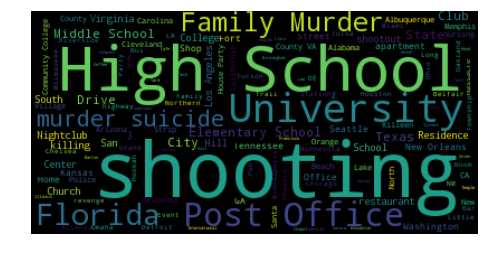

In [43]:
# Generate a word cloud image
wordcloud = WordCloud().generate(" ".join(data['Title']))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Através das palavras mostradas na nuvem, as de maior destaque, podemos notar que:
- **Family Murder**: Indica que nos casos dos tiroteios, uma parte consideravel dos alvos era uma família. Isso pode indicar algum grau de parentesco do assassino com as vitimas;
- **High School**: Isso pode indicar que tiveram estudantes envolvidos no acontecimento ou que o ocorrido foi em uma escola, a primeira opção se torna mais plausível se observarmos que a palavra *University* também aparece com frequência. Ou seja, um indica as vitimas e outro o local;
- **Murder suicide**: Boa parte dos assassinos muito provavelmente cometeram ou tentaram cometer o suicidio após realizarem o ato. 

Podemos ignorar a palavra **Shooting**, pois o dataset em questão já indica que os casos são de tiroteio, portanto é uma palavra que provavelmente vai aparecer em todas as linhas.

#10. Ocorridos nas escolas

Iremos fazer uma análise com base no local que ocorreu o tiroteio, mais especificamente nas escolas.

In [62]:
# Palavras que indiquem se o ocorrido foi na escola
palavras_escola = ['college', 'university', 'school']

# Função para verificar se ocorreu ou não na escola
def incident_school(incident_area):
  incident_area = incident_area.lower()
  
  # Caso tenha ocorrido em uma escola, atribui o valor 1
  for palavra in palavras_escola:
    if palavra in incident_area.lower():
      return 1
  # Caso não, atribui o valor 0
  return 0

# Percorre a Series e verifica se ocorreu ou não em uma escola, depois soma tudo
incident_school_sum = data['Incident Area'].dropna().apply(incident_school).sum()

# Mostrar o resultado
print("De {} casos, {} ocorreram em escolas. Um total de {}.".format(
    data.shape[0], incident_school_sum, (incident_school_sum/data.shape[0])))

De 303 casos, 52 ocorreram em escolas. Um total de 0.1716171617161716.


Pouco mais do que 17% dos casos ocorreram em escolas, o que é um percentual bem grande se compararmos a quantidade de tipos de estabelecimentos que existem.

#11. Referências

Disponível em: <https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years#Mass%20Shootings%20Dataset%20Ver%205.csv>. Acesso em: 23/10/2018.

Disponível em: <https://constitutioncenter.org/interactive-constitution/amendments/amendment-ii>. Acesso em: 27/10/2018.

Disponível em: <https://edition.cnn.com/2017/10/03/americas/us-gun-statistics/index.html>. Acesso em: 27/10/2018.

Disponível em: <http://www.smallarmssurvey.org/publications/by-type/yearbook/small-arms-survey-2007.html>. Acesso em: 28/10/2018.

Disponível em: <https://www.ncbi.nlm.nih.gov/pubmed/26822013>. Acesso em: 28/10/2018.

Disponível em: <https://www.rand.org/research/gun-policy/analysis/supplementary/mass-shootings.html>. Acesso em: 27/10/2018.

Disponível em: <https://www.washingtonpost.com/news/the-fix/wp/2017/10/04/the-squishy-definition-of-mass-shooting-complicates-media-coverage/?noredirect=on&utm_term=.a64b2139e858>. Acesso em: 27/10/2018.

Disponível em: <https://www.gunviolencearchive.org/methodology>. Acesso em: 28/10/2018.

Disponível em: <https://www.massshootingtracker.org/about>. Acesso em: 28/10/2018.

Disponível em: <https://revistagalileu.globo.com/Ciencia/noticia/2017/10/entenda-mente-de-um-assassino-em-massa-e-como-para-lo.html>. Acesso em: 28/10/2018.

Disponível em: <https://pt.wikipedia.org/wiki/Terrorismo>. Acesso em: 28/10/2018.

Disponível em: <https://www.significados.com.br/psicopata/>. Acesso em: 28/10/2018.

Disponível em: <https://www.iflscience.com/brain/if-you-give-man-gun-evolutionary-psychology-mass-shootings/>. Acesso em: 28/10/2018.

Disponível em:<https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json>. Acesso em: 28/10/2018.